<a href="https://colab.research.google.com/github/lorenaleite/data_science/blob/master/WordCloud_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elaborando uma *WordCloud* com Python

> Este *notebook* foi elaborado com o auxílio do *blog* [Sigmoidal](http://sigmoidal.ai/como-criar-uma-wordcloud-em-python/).


Neste projeto iremos examinar o código para gerar uma nuvem de palavras através da linguagem de programação Python.

A nuvem de palavras é um instrumento de vizualização muito interessante, que pode sugerir algumas hipóteses em relação a determinada problemática.

É composta por uma reunião de palavras coletadas em uma amostra, que pode advir de sites, pdf, letras de músicas, planilhas, etc.

A frequência com que as palavras aparecem é o que determina o tamanho das letras e sua cor no gráfico. Sendo assim, as palavras que aparecem mais vezes estarão em evidência, e as palavras com menos frequência estarão dispostas com uma fonte menor.


Como exemplo, podemos visualizar o gráfico abaixo com as principais palavras relacionadas com a pandemia.


<p align=center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTA-oJ8qF-XEhYpKWLsvWQKNdrLpX-rnz_7Aw&usqp=CAU" width="300px"></p>






### 1) Primeira Etapa

Importando as bibliotecas e pacotes necessários para elaboração do projeto.

In [ ]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# instalar wordcloud caso você não tenha
!pip install wordcloud -q




### 2) Segunda Etapa
Importar o arquivo que será analisado.

Pode ser uma planilha em excel, um arquivo txt, ou qualquer outro banco de dados.

*Obs: Neste projeto será utilizado um arquivo txt elaborado pelo autor.*

As palavras presentes na lista são as que apresetam maior relevância na vida do autor, atualmente. No entanto, a frequência está determinada pelo tempo que o mesmo dispende para cada assunto em sua rotina.

In [ ]:
# importar o arquivo de texto em um df
df = pd.read_csv("/content/nuvem.txt")



Nesta etapa também foram eliminadas todas as colunas ausentes, caso exista.



In [ ]:
# eliminar as colunas com valores ausentes
Palavras = df.dropna(subset=['Palavras'], axis=0)['Palavras']

Verificando algumas palavras dentro do documento (coluna).


In [ ]:
# exemplos de descrições para as palavras relevantes
display(Palavras.iloc[13])
display(Palavras.iloc[36])
display(Palavras.iloc[72])
display(Palavras.iloc[165])

'Big data'

'Data science'

'Engenharia de produção'

'Resiliência'

Para gerar uma *wordcloud* é necessário reunir todas as palavras.

Apesar desta amostra não possuir um volume expressivo de palavras, atingindo o total de 2117, iremos utilizar o *wordcloud* para identificar alguns pontos relevantes.



Verificando a quantidade de palavras

In [ ]:
# concatenar as palavras
all_Palavras = " ".join(s for s in Palavras)

# concatenar as palavras
all_Palavras = " ".join(s for s in Palavras)

In [ ]:
# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_Palavras)))

Quantidade de Palavras: 2117


Antes de gerar um gráfico *wordcloud* deve-se considerar a lista de *stopwords*.

Geralmente, as *stopwords* aparecem com muita frequência, no entato, por não gerar nenhum resultado relevante são removidas da análise, são elas: "a", "não", "mas", "and", "not", entre outras.


In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])


### 3) Terceira Etapa

Gerando uma *wordcloud*.



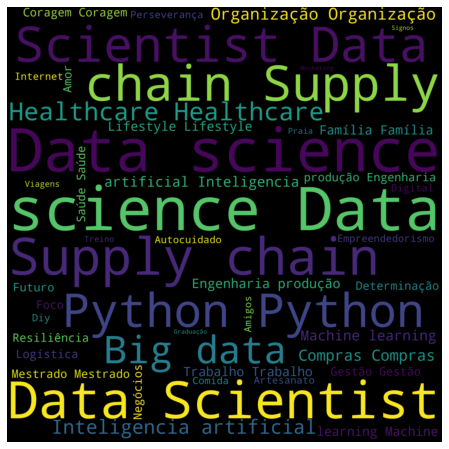

In [ ]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=2000, height=2000).generate(all_Palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

### 4) Quarta Etapa

Nesta etapa a *wordcloud* gerada anteriormente será plotada no mesmo formato da imagem abaixo:


<p align=left><img src="https://img.ibxk.com.br/2016/04/05/05185104012783.jpg?w=1040" width="300px"></p>


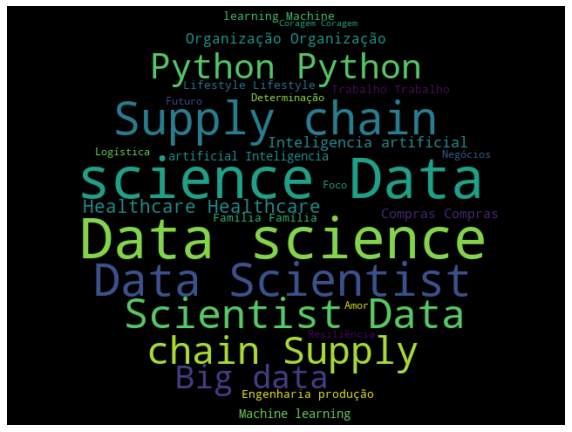

In [ ]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("/content/05185104012783.jpg"))

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=100, height=100, max_words=500,
                      mask=rio_mask, max_font_size=1000,
                      min_font_size=10).generate(all_Palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()


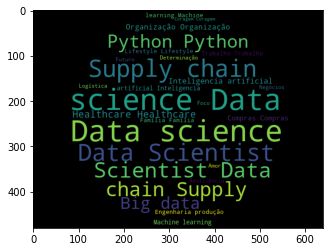

In [ ]:
plt.imshow(wordcloud)
wordcloud.to_file("/content/05185104012783.jpg")

### 5) Conclusão

Ao vizualizar esta nuvem de palavras, foi possível identificar que neste arquivo de texto as expressões em evidência são: Data Science, Big Data, Supply Chain, Python, Data Scientist e Inteligência artificial.

Essa é a finalidade da nuvem de palavras, identificar e apontar as palavras com maior frequência em uma determinada amostra.

## Referências

MELO, CARLOS. Como criar uma *wordcloud* com python. Disponível: <https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/>. Acesso em julho, 2020.